
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we'll be analyzing data associated with 10,000 movies collected from The Movie Database (TMDb). This dataset includes movie basic data such as title, director, runtime, budget, genres, cast, release date and, movie metrics such as popularity, user rating. In particular, we'll be interested in finding trends among the movies with high revenue and high popularity. And also find how the movie economy and features changed from 1960 to 2015. Finally, we'll be able to find the characteristics of a successful movie.

> Research Questions:
1. What are the highest revenue and lowest revenue movies?
2. What are the highest and lowest popularity movies?
3. What kinds of properties are associated with movies that have high revenues? <br/>
    1.1 Do higher revenue movies receive higher popularity?<br/>
    1.2 Do higher revenue movies always have a higher budget?<br/>
    1.3 What is the average runtime for higher and lower revenue movies?<br/>
    1.4 Do higher revenue movies always get higher vote count?<br/>
4. Which genres are most popular from 2010 to 2015? 
5. What are the frequently used top 5 genres in movies from 1960 to 2015?
6. Top 5 Genres, Directors and, Casts in movies with high revenue? 
7. Top 5 Genres, Directors and, Casts in most popular movies?
8. How much have the movie economy has improved by each year?
9. Is there a relationship between the runtime of a movie and popularity?
10. What is the trend of the average runtime of movies from year to year?
11. Which year has released the most number of movies?
12. What is the best month to release a movie?

In [122]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we'll check the raw dataset and identity the general properties associated with the raw dataset. According to our observations, in the 'Data Cleaning ' section, we'll be transforming the dataset to a more desired form with the intent of making it more appropriate for our analysis.

### General Properties

In [123]:
# Loading data and print first two lines
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [124]:
# finding the size of the dataset
tmdb_df.shape
print('This dataset contains {} rows and {} columns'.format(tmdb_df.shape[0], tmdb_df.shape[1]))

This dataset contains 10866 rows and 21 columns


In [125]:
# finding the dataset information- missing values, data types
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Observations:
    * imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies columns have null values.
    * Considering the datatypes, it seems only 'release date' column has the wrong date-type. 


In [126]:
#checking the release_date datatype. 
data_type = type(tmdb_df['release_date'][1])
print('release_date column datatype is {}'.format(data_type))

release_date column datatype is <class 'str'>


In [127]:
#checking number of null values in each column
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Observations:
    * homepage, tagline, keywords, production_companies has considerable amount (more than 1000) of null values. 
    * imdb_id, cast, director, genres, overview  have less than 100 null values.


In [128]:
#checking the total number of null values in the dataset
total_null = tmdb_df.isnull().sum().sum()
print('This dataset have {} null values.'.format(total_null))

This dataset have 13434 null values.


In [129]:
# finding duplicate rows
duplicate_rows_count = sum(tmdb_df.duplicated())
print('Number of duplicate rows in the dataset: {}.'.format(duplicate_rows_count))

Number of duplicate rows in the dataset: 1.


In [130]:
#finding number of unique values in each column
tmdb_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> Observation;
    * Two rows have same id number
    * Non of the columns contain one value for all rows

In [131]:
# finding basic statistics of all numerical columns
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



   > Observations:
       * In this dataset there are films released from 1960 - 2015
       * There are zero values in budget, revenue and runtime columns (min value), which is not acceptable.

In [132]:
#finding number of zero values in budget, revenue and runtime columns
zero_data = (tmdb_df[['budget', 'revenue', 'runtime']] == 0).sum()
print('total number of zero values in budget, revenue and runtime columns: \n{}'.format(zero_data))

total number of zero values in budget, revenue and runtime columns: 
budget     5696
revenue    6016
runtime      31
dtype: int64


> Observation:
    * budget column has 5696(52%) zero values, revenue column has 6016(55%) zero values and runtime column has 31 zero values.
> The total number of rows in this data set is 10866. More than half of rows have zero values for budget(52%) and revenue(55%). If we remove these rows from the dataset then more than half of rows will be deleted. This will negatively impact the analysis. Therefore I decided to fill these zero values with column mean value. Because budget, revenue, and runtime values cannot be zero as all these movies have released.

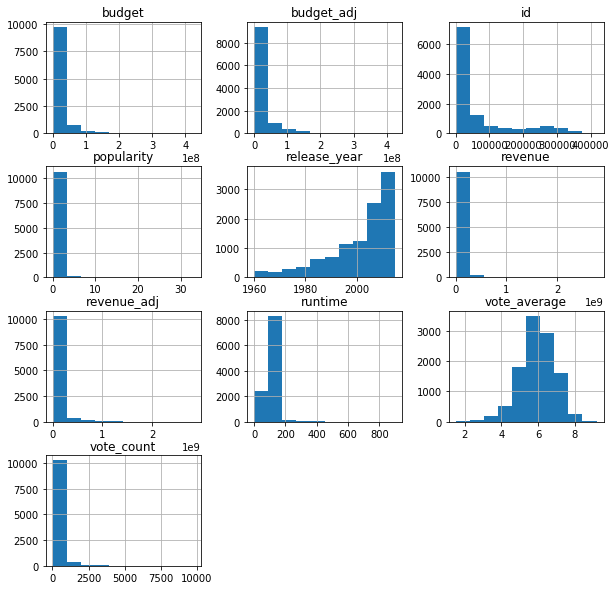

In [133]:
# finding how data are distributed in the dataset graphically.
tmdb_df.hist(figsize=(10,10));

> Observation:
    * budget, popularity, revenue, runtime, vote_count graphs are right skewed. release_year graph is left skewed.

### Data Cleaning

> In this section, the dataset will be transformed into an appropriate format for intended data analysis. We'll be addressing the issues we have identified in the above section. Steps that have been used to clean data are given below, <br/>
 
> Data cleaning steps 
    1. Drop columns which are not using in this analysis - id, imdb_id, homepage, tagline, keywords, overview, production_companies, vote_average, budget_adj, revenue_adj
    2. Correct the 'release date' data type to 'datetime' format.
    3. Remove duplicate rows
    4. Fill zero values in the budget, revenue, and runtime columns with column mean value. 
    5. Drop rows with null values (null values exits only in cast(76), director(44) and genres(23) columns)

In [134]:
# dropping unused columns in this analysis 
tmdb_df.drop(['id','imdb_id','homepage','tagline','keywords','overview', 'production_companies', 'vote_average','budget_adj','revenue_adj'], axis=1, inplace=True)

In [135]:
# finding the size of the dataset
tmdb_df.shape
print('This dataset contains {} rows and {} columns'.format(tmdb_df.shape[0], tmdb_df.shape[1]))

This dataset contains 10866 rows and 11 columns


In [136]:
# changing release_date datatype to datetime from string object
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [137]:
# checking the release_date datatype. New value should be timestamp 
data_type = type(tmdb_df['release_date'][1])
print('release_date column datatype is {}'.format(data_type))

release_date column datatype is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [138]:
# drop duplicate rows
tmdb_df.drop_duplicates(inplace=True)

In [139]:
# finding number of duplicate rows. This should be zero now.
duplicate_rows_count = sum(tmdb_df.duplicated())
print('Number of duplicate rows in the dataset: {}.'.format(duplicate_rows_count))

Number of duplicate rows in the dataset: 0.


In [140]:
# finding the size of the dataset. one row need to be reduced from the total number of rows
tmdb_df.shape
print('This dataset contains {} rows and {} columns'.format(tmdb_df.shape[0], tmdb_df.shape[1]))

This dataset contains 10865 rows and 11 columns


In [141]:
# This function replace the zero values in a column by column mean value
def replace_with_mean(x,y):
    '''
    Replaces the zero values in a column by column mean value
    input variables
    x - data frame, y - column name
    '''
    x[y] = x[y].replace(0, x[y].mean())    

In [142]:
# replace zero values in budget, revenue and runtime columns with its mean value
replace_with_mean(tmdb_df, 'budget')
replace_with_mean(tmdb_df, 'revenue')
replace_with_mean(tmdb_df, 'runtime')

In [143]:
# confirm that all zero values in budget, revenue and runtime columns are replaced with mean values.
zero_data = (tmdb_df[['budget', 'revenue', 'runtime']] == 0).sum()
print('total number of zero values in budget, revenue and runtime columns: \n{}'.format(zero_data))

total number of zero values in budget, revenue and runtime columns: 
budget     0
revenue    0
runtime    0
dtype: int64


In [144]:
# drop all rows with null values in the dataset
tmdb_df.dropna(inplace=True)

In [145]:
# total number of null values in the dataset. Now this should be zero
total_null = tmdb_df.isnull().sum().sum()
print('This dataset have {} null values.'.format(total_null))

This dataset have 0 null values.


In [146]:
# finding the size of the dataset
tmdb_df.shape
print('This dataset contains {} rows and {} columns'.format(tmdb_df.shape[0], tmdb_df.shape[1]))

This dataset contains 10731 rows and 11 columns


In [147]:
# finding the dataset information in the final data set
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10731 non-null float64
budget            10731 non-null float64
revenue           10731 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null float64
genres            10731 non-null object
release_date      10731 non-null datetime64[ns]
vote_count        10731 non-null int64
release_year      10731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 1006.0+ KB


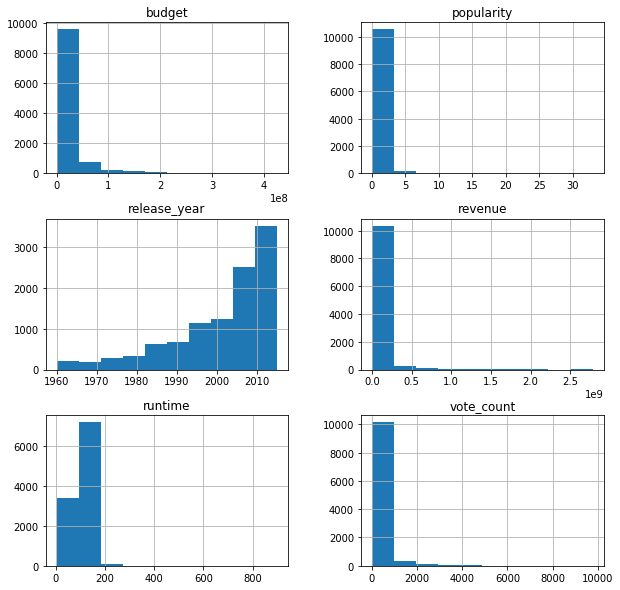

In [148]:
# finding how data are distributed in the final dataset graphically.
tmdb_df.hist(figsize=(10,10));

> After executing all cleaning steps final data set contains, 
    * 10731 rows and 11 columns.
    * No null values
    * All data are in correct format
    * budget, popoularity, revenue, runtime and vote_count columns are right skewed and release_year column has left skewed.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 -  What are the highest revenue and lowest revenue movies?

In [149]:
# functions to find maximum and minimum values in a given column
def find_max(x, dataframe):
    '''
    find the maximum value in a given column and returns the index of the row containing column maximum
    input --> x = dataframe.column_name, dataframe = datafram name
    output --> index of the row containing column maximum
    '''
    idx = x.idxmax()
    return dataframe.loc[idx]

def find_min(x,dataframe):
    '''
    find the minimum value in a given column and returns the index of the row containing column minimum
    input --> x = dataframe.column_name, dataframe = datafram name
    output --> index of the row containing column minimum
    '''
    idx = x.idxmin()
    return dataframe.loc[idx]

In [150]:
# calling the find_max funtion
max_value = find_max(tmdb_df.revenue, tmdb_df)
print('The {} movie has earned the {} amount of highest revenue.'.format(max_value.original_title, max_value.revenue))

The Avatar movie has earned the 2781505847.0 amount of highest revenue.


In [151]:
# calling the find_min funtion
min_value = find_min(tmdb_df.revenue, tmdb_df)
print('The {} movie has earned the {} amount of lowest revenue.'.format(min_value.original_title, min_value.revenue))

The Shattered Glass movie has earned the 2.0 amount of lowest revenue.


### Research Question 2 -  What are the highest and lowest popularity movies?

In [152]:
# calling the find_max funtion
max_value = find_max(tmdb_df.popularity, tmdb_df)
print('The {} movie has got the {} amount of highest popularity.'.format(max_value.original_title, max_value.popularity))

The Jurassic World movie has got the 32.985763 amount of highest popularity.


In [153]:
# calling the find_min funtion
min_value = find_min(tmdb_df.popularity, tmdb_df)
print('{} movie has got the {} amount of lowest popularity.'.format(min_value.original_title, min_value.popularity))

The Hospital movie has got the 0.000188 amount of lowest popularity.


### Research Question 3 -  What kinds of properties are associated with movies that have high revenues?

In [154]:
# calculating the median of revenue
revenue_median = tmdb_df['revenue'].median()
print('The median value of the revenum column is {}.'.format(revenue_median))

The median value of the revenum column is 39826896.07685228.


In [155]:
# creating two data frames for high revenue movies and low revenue movies depending on the median value
high_rev = tmdb_df.query('revenue > 39826896.076852277')
low_rev = tmdb_df.query('revenue <= 39826896.076852277')
print('high_rev dataset contains {} rows and {} columns'.format(high_rev.shape[0], high_rev.shape[1]))
print('low_rev dataset contains {} rows and {} columns'.format(low_rev.shape[0], low_rev.shape[1]))

high_rev dataset contains 2170 rows and 11 columns
low_rev dataset contains 8561 rows and 11 columns


#### Research Question 3.1 - Do higher revenue movies receive higher popularity?

In [156]:
# This function (calculate_mean) calculates the mean of a given column in a given dataframe.
def calculate_mean(x):
    '''
    calculates the mean of a given column
    input --> x = dataframe.column_name
    output --> mean of the column
    '''
    result = x.mean()
    return result

In [157]:
# calculate the average revenue
mean_revenue_high = calculate_mean(high_rev.revenue)
mean_revenue_low = calculate_mean(low_rev.revenue)
print('Average revenue for the high revenue movies is {}.'.format(mean_revenue_high))
print('Average revenue value for the low revenue movies is {}.'.format(mean_revenue_low))

Average revenue for the high revenue movies is 183767258.32258064.
Average revenue value for the low revenue movies is 31351305.600689895.


In [158]:
# calculate the popularity mean
mean_popularity_high = calculate_mean(high_rev.popularity)
mean_popularity_low = calculate_mean(low_rev.popularity)
mean_popularity_high, mean_popularity_low
print('Average popularity value for the high revenue movies is {}.'.format(mean_popularity_high))
print('Average popularity value for the low revenue movies is {}.'.format(mean_popularity_low))

Average popularity value for the high revenue movies is 1.6244546184331794.
Average popularity value for the low revenue movies is 0.4062775595140754.


In [159]:
# this funtion plot a bar graph with given values 
def plot_bar_chart(heights,labels,t,x,y):
    '''
    plot a bar chart
    input 
        heights = an array containing heights of bars
        labels = an array containing x-axis labels
        t = title
        x = x-axis label
        y = y-axis label          
    '''
    locations = [1,2]
    plt.bar(locations, heights, tick_label=labels)
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y);    

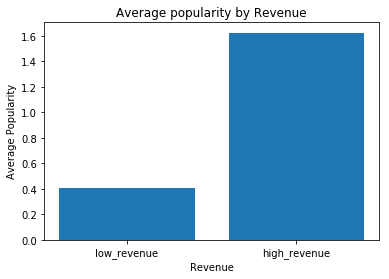

In [160]:
# plotting the average popularity by revenue
heights = [mean_popularity_low , mean_popularity_high]
labels = ['low_revenue', 'high_revenue']
plot_bar_chart(heights, labels, 'Average popularity by Revenue', 'Revenue', 'Average Popularity' )

> According to the above results, we can conclude that __high revenue movies have high popularity.__

#### Research Question 3.2 - Do higher revenue movies always have higher budget?

In [161]:
# calculate the budget mean
mean_budget_high = calculate_mean(high_rev.budget)
mean_budget_low = calculate_mean(low_rev.budget)
print('Average budget value for the high revenue movies is {}.'.format(mean_budget_high))
print('Average budget value for the low revenue movies is {}.'.format(mean_budget_low))

Average budget value for the high revenue movies is 52878810.48674418.
Average budget value for the low revenue movies is 14681132.540897775.


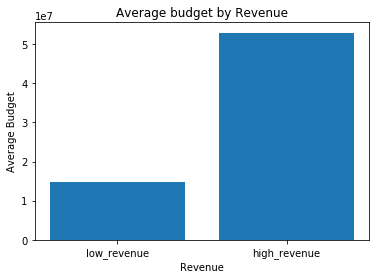

In [162]:
# plotting the average budget by revenue
heights = [mean_budget_low , mean_budget_high]
plot_bar_chart(heights, labels, 'Average budget by Revenue','Revenue','Average Budget')

> According to the above results, we can conclude that **high revenue movies have high budget.**

#### Research Question 3.3 - What is the average runtime for higher and lower revenue movies?

In [163]:
# calculate the runtime mean
mean_runtime_high = calculate_mean(high_rev.runtime)
mean_runtime_low = calculate_mean(low_rev.runtime)
print('Average runtime value for the high revenue movies is {}.'.format(mean_runtime_high))
print('Average runtime value for the low revenue movies is {}.'.format(mean_runtime_low))

Average runtime value for the high revenue movies is 112.6589861751152.
Average runtime value for the low revenue movies is 100.21971850534426.


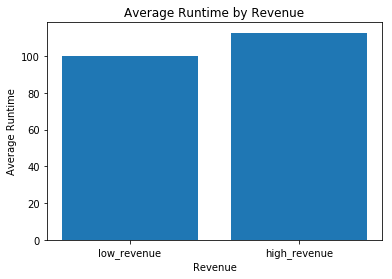

In [164]:
# plotting the average runtime by revenue
heights = [mean_runtime_low , mean_runtime_high]
plot_bar_chart(heights, labels, 'Average Runtime by Revenue', 'Revenue','Average Runtime')

> By considering the above graph we can conclude that there is **no significant impact from movie runtime to movie revenue.**

#### Research Question 3.4 - Do higher revenue movies always get higher vote count?

In [165]:
# calculate the vote_count mean
mean_vote_count_high = calculate_mean(high_rev.vote_count)
mean_vote_count_low = calculate_mean(low_rev.vote_count)
print('Average vote count for the high revenue movies is {}.'.format(mean_vote_count_high))
print('Average vote count for the low revenue movies is {}.'.format(mean_vote_count_low))

Average vote count for the high revenue movies is 814.6377880184332.
Average vote count for the low revenue movies is 69.03971498656699.


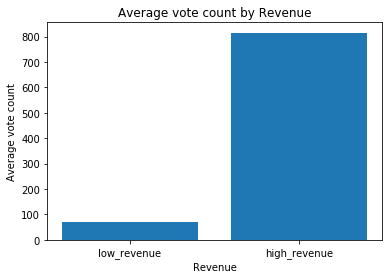

In [166]:
# plotting the average vote count by revenue
heights = [mean_vote_count_low , mean_vote_count_high]
plot_bar_chart(heights, labels, 'Average vote count by Revenue', 'Revenue' , 'Average vote count')

> According to the above results, we can conclude that **high revenue movies always get high vote count.**

> Properties associated with high revenue movies are high popularity, high budget and high vote count. 

### Research Question 4  - Which genres are most popular from year 2020 to year 2015?

> To answer the above question we need to analyze only two columns(genres and release_year) from the dataset. So before analyzing I'm creating a copy of the original dataset(tmdb_df) and drop unnecessary columns from the copied dataset(geners_df). 

In [167]:
# make a copy of the dataset to investigate this problem.
genres_df = tmdb_df.copy() 

In [168]:
genres_df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015


In [169]:
# Dropping unnessary columns from the new dataset
genres_df.drop(['budget', 'revenue', 'original_title', 'cast', 'director', 'runtime', 'release_date', 'vote_count', 'popularity'], axis=1, inplace=True)

In [170]:
# checking the new dataset - it has only two columns
genres_df.head(2)

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015
1,Action|Adventure|Science Fiction|Thriller,2015


In [171]:
# creating a pandas series using genres_df
index = np.array(genres_df['release_year'])
data = np.array(genres_df['genres'])
genres_series = pd.Series(data, index)

In [172]:
# checking the genres_series
genres_series.head(5)

2015    Action|Adventure|Science Fiction|Thriller
2015    Action|Adventure|Science Fiction|Thriller
2015           Adventure|Science Fiction|Thriller
2015     Action|Adventure|Science Fiction|Fantasy
2015                        Action|Crime|Thriller
dtype: object

In [173]:
# this function filter data(genres) according to a given value(ex:release_year) and count the number of occurences of one value(ex:Drama)
def filter_data(x, y):
    '''
    input
    x = data series
    y = filtering value (ex: release_year)
    output
    data_count = dataset including the word and it is the frequency of occurrences  
    '''
    all_data = x[y].str.cat(sep = '|')              # filter data according to 'y' and combine all rows by seperating |
    seperated_data = pd.Series(all_data.split('|')) # split the words seperated by | and make a list
    data_count = seperated_data.value_counts()      # count each word to get the number of occurrences in the seperated_data list
    
    return data_count

In [174]:
# plotting a bar chat according to the given details
def plot_the_graph(c, t, x, y):
    '''
    input --> c = dataset, t=title, x= x-axis label, y = y-axis label
    '''
    c.plot(kind='bar', title=t)
    plt.xlabel(x)
    plt.ylabel(y);

In [175]:
#calculating the genres_count for 2015
genres_count = filter_data(genres_series, 2015)
genres_count.head(5)

Drama       260
Thriller    171
Comedy      160
Horror      125
Action      106
dtype: int64

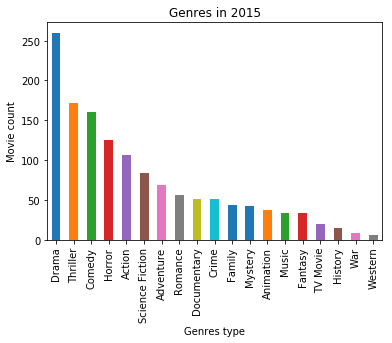

In [176]:
# plotting the graph
plot_the_graph(genres_count, 'Genres in 2015','Genres type','Movie count')

> Most popular genres in 2015 are Drama, Thriller, Comedy, Horror and Action

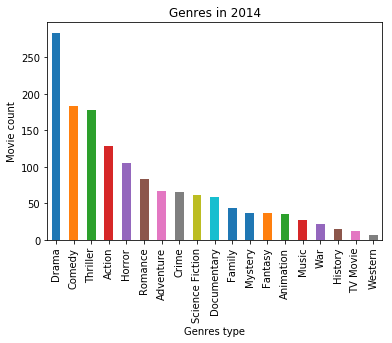

In [177]:
#calculating and plotting the genres_count for 2014
genres_count = filter_data(genres_series, 2014)
plot_the_graph(genres_count, 'Genres in 2014','Genres type','Movie count')

> Most popular genres in 2014 are Drama, Comedy, Thriller, Action and Horror

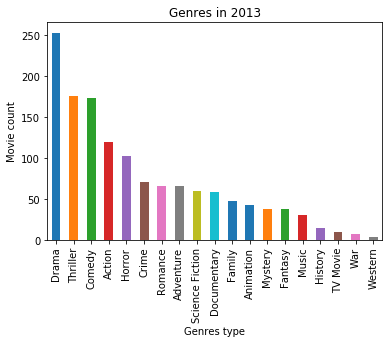

In [178]:
#calculating and plotting the genres_count for 2013
genres_count = filter_data(genres_series, 2013)
plot_the_graph(genres_count,'Genres in 2013','Genres type','Movie count')

> Most popular genres in 2013 are Drama, Thriller, Comedy, Action and Horror

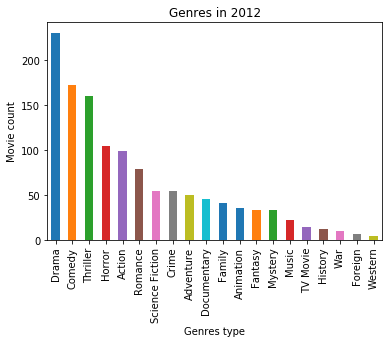

In [179]:
#calculating and plotting the genres_count for 2012
genres_count = filter_data(genres_series, 2012)
plot_the_graph(genres_count, 'Genres in 2012','Genres type','Movie count')

> Most popular genres in 2012 are Drama, Comedy, Thriller, Horror and Action

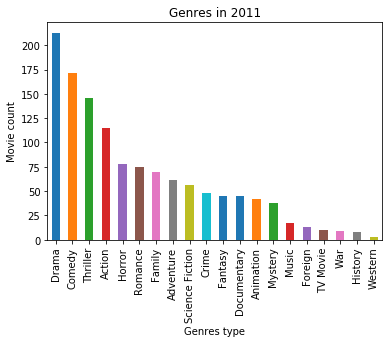

In [180]:
#calculating and plotting the genres_count for 2011
genres_count = filter_data(genres_series, 2011)
plot_the_graph(genres_count, 'Genres in 2011','Genres type','Movie count')

> Most popular genres in 2011 are Drama, Comedy, Thriller, Action and Horror

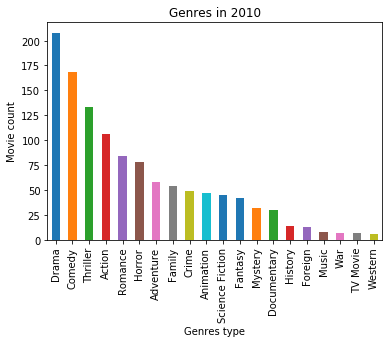

In [181]:
#calculating and plotting the genres_count for 2010
genres_count = filter_data(genres_series, 2010)
plot_the_graph(genres_count, 'Genres in 2010','Genres type','Movie count')

> Most popular genres in 2010 are Drama, Comedy, Thriller, Action and Romance

> The most popular genre from 2010 to 2015 is 'Drama' followed by 'Comedy'. The third popular genre is 'Thriller'. The next two are 'Action' and 'Horror'. The least popular genre according to the above graphs is 'Western'. 

### Research Question 5 -  What are the frequently used top 5 genres in movies from 1960 to 2015? 

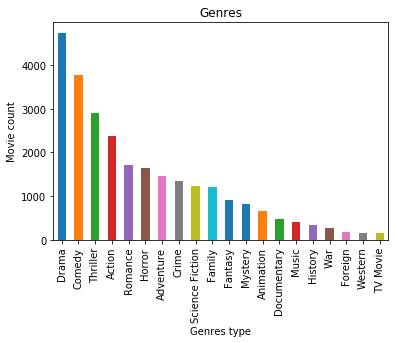

In [182]:
#calculating and plotting the genres_count for full dataset
all_genres_count = filter_data(genres_df, 'genres')
plot_the_graph(all_genres_count, 'Genres','Genres type','Movie count')

> According to the graph, top 5 most frequently used genres in the whole data set are, 'Drama', 'Comedy', 'Thriller', 'Action' and 'Romance'. Least used genres are 'History','War','Foreign','Western','TV Movie'

### Research Question 6 - Top 5 Genres, Directors and  Casts in movies with high revenue ? 

#### 6.1 - Genres used in high revenue movies. 

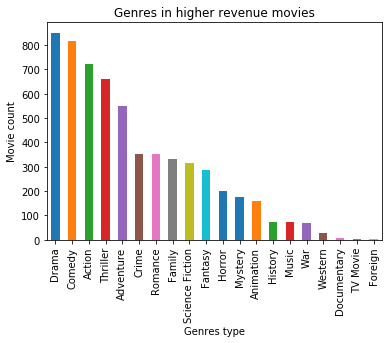

In [183]:
#calculating and plotting the genres_count for high revenue movies
high_rev_genres_count = filter_data(high_rev, 'genres')
plot_the_graph(high_rev_genres_count, 'Genres in higher revenue movies', 'Genres type', 'Movie count')

> According to the graph, top 5 frequently used genres in high revenue movies are 'Drama', 'Comedy', 'Action', 'Thriller' and 'Adventure'

##### 6.2 -  Top 5 directors in high revenue movies.

In [184]:
#calculating the movie count for each director for high revenue movies
high_rev_director_count = filter_data(high_rev, 'director')
high_rev_director_count

Steven Spielberg         25
Clint Eastwood           20
Ridley Scott             17
Ron Howard               16
Tim Burton               15
Robert Zemeckis          14
Michael Bay              11
Tony Scott               11
Joel Schumacher          11
Martin Scorsese          10
Richard Donner           10
Ivan Reitman             10
Oliver Stone             10
Shawn Levy               10
David Fincher            10
Chris Columbus            9
Dennis Dugan              9
Barry Levinson            9
Brett Ratner              9
Peter Farrelly            9
Raja Gosnell              9
M. Night Shyamalan        9
Steven Soderbergh         9
Bobby Farrelly            8
Renny Harlin              8
Jon Turteltaub            8
Garry Marshall            8
Paul W.S. Anderson        8
Rob Cohen                 8
Rob Reiner                8
                         ..
Peter Spierig             1
Ric Roman Waugh           1
Val Guest                 1
James Bridges             1
Kirsten Sheridan    

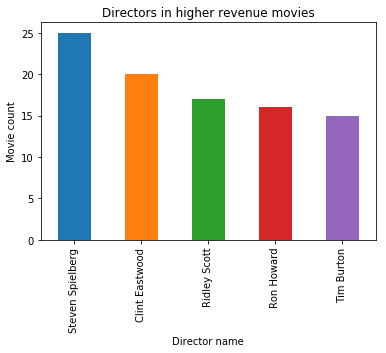

In [185]:
# plotting the graph for top 5 movie directors
plot_the_graph(high_rev_director_count.head(5), 'Directors in higher revenue movies', 'Director name', 'Movie count')

> Top 5 directors of high revenue movies are: Steven Spielberg, Clint Eastwood, Ridley Scott, Ron Howard and Tim Burton.

#### 6.3 - Top casts in high revenue movies.

In [186]:
#calculating the movie count for each casts for high revenue movies
high_rev_cast_count = filter_data(high_rev, 'cast')
#high_rev_cast_count

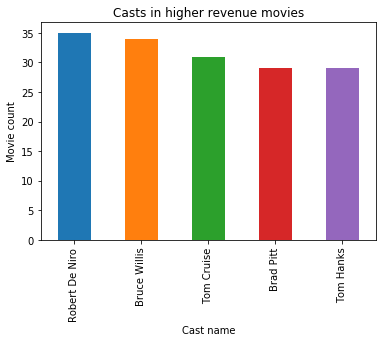

In [187]:
# plotting the graph for top 5 casts
plot_the_graph(high_rev_cast_count.head(5), 'Casts in higher revenue movies', 'Cast name', 'Movie count')

> Top 5 casts in in high revenue movies are: Robert De Niro, Bruce Willis, Tom Cruise, Brad Pitt, Tom Hanks 

### Research Question 7 - Top 5 Genres, Directors and  Casts in most popular movies ? 

In [188]:
# calculating the median of revenue
popularity_median= tmdb_df['popularity'].median()
popularity_median

0.38708100000000001

In [189]:
# creating two data frames for high revenue movies and low revenue movies
high_pop = tmdb_df.query('popularity > 0.38708100000000001')
low_pop = tmdb_df.query('popularity <= 0.38708100000000001')
print('high_pop dataset contains {} rows and {} columns'.format(high_pop.shape[0], high_pop.shape[1]))
print('low_pop dataset contains {} rows and {} columns'.format(low_pop.shape[0], low_pop.shape[1]))

high_pop dataset contains 5365 rows and 11 columns
low_pop dataset contains 5366 rows and 11 columns


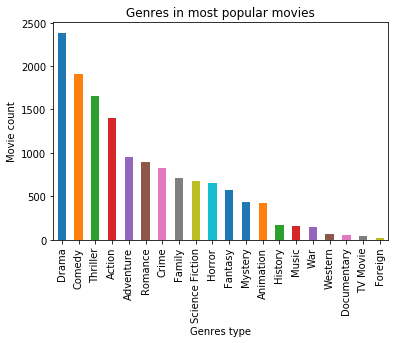

In [190]:
#calculating and plotting the genres_count for most popular movies
high_pop_genres_count = filter_data(high_pop, 'genres')
plot_the_graph(high_pop_genres_count, 'Genres in most popular movies', 'Genres type', 'Movie count')

> Most popular movie genres are: Drama, Comedy, Thriller, Action and Adventure.

In [191]:
#calculating the movie count for each director for high revenue movies
high_pop_director_count = filter_data(high_pop, 'director')
#high_pop_director_count

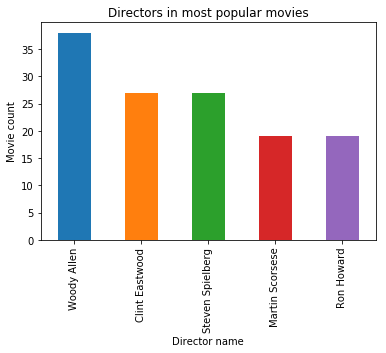

In [192]:
# plotting the graph for top 5 movie directors
plot_the_graph(high_pop_director_count.head(5), 'Directors in most popular movies', 'Director name', 'Movie count')

> Top 5 movie directors in most popular movies are: Woody Allen, Steven Spielberg, Clint Eastwood, Ridley Scott, Ron Howard

In [193]:
#calculating the movie count for each casts for most popular movies
high_pop_cast_count = filter_data(high_pop, 'cast')
high_pop_cast_count

Robert De Niro           61
Samuel L. Jackson        60
Bruce Willis             53
Nicolas Cage             51
Tom Hanks                40
Morgan Freeman           39
Johnny Depp              39
Sylvester Stallone       37
Matt Damon               36
Brad Pitt                36
Antonio Banderas         36
Liam Neeson              36
Ed Harris                35
Michael Caine            35
Julianne Moore           35
Nicole Kidman            35
Ewan McGregor            35
Harrison Ford            35
Robin Williams           35
John Goodman             35
Susan Sarandon           35
Anthony Hopkins          34
Clint Eastwood           34
Dustin Hoffman           34
Mark Wahlberg            34
John Cusack              33
Eddie Murphy             33
Tom Cruise               33
Arnold Schwarzenegger    33
Adam Sandler             33
                         ..
Lucy Gordon               1
Brooke Smith              1
Aaron Milo                1
Tamla Kari                1
Alexander Scheer    

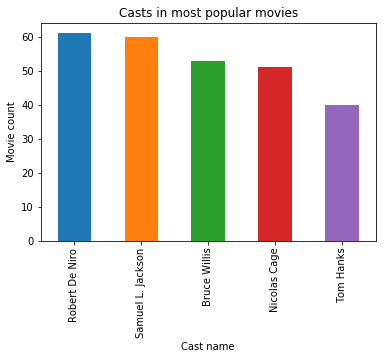

In [194]:
# plotting the graph for top 5 casts
plot_the_graph(high_pop_cast_count.head(5), 'Casts in most popular movies', 'Cast name', 'Movie count')

> Top 5 casts in most popular movies are: Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, Tom Hanks

### Research Question 8 - How much have movie economy has improved by each year ?

In [195]:
# calculating average revenue earned by movies in each year
revenue_mean = tmdb_df.groupby('release_year').revenue.mean()
# calculating average budget spend by movies in each year
budget_mean = tmdb_df.groupby('release_year').budget.mean()
# calculating the average profit earned by movies in each yeat
profit_inc = revenue_mean - budget_mean

In [196]:
# this function plots a line graph according to the given data
def plot_line_graph(p,t,x,y):
    '''
    p - values for y axis
    t - graph title
    x - label for x axis
    y - label for y axis
    '''
    plt.subplots(figsize=(8, 5))
    plt.plot(p.index, p)
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y);

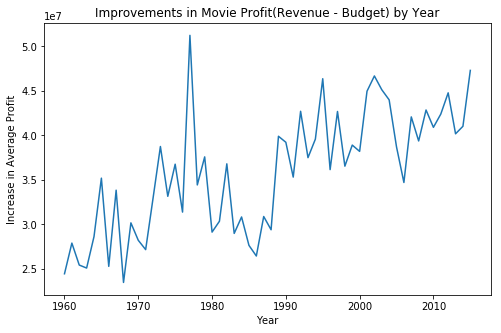

In [197]:
# plotting the earned average profit in each year
plot_line_graph(profit_inc,'Improvements in Movie Profit(Revenue - Budget) by Year','Year','Increase in Average Profit');

In [198]:
# finding the maximum profit earned year
print('Maximum average profit has earned in {}'.format(profit_inc.idxmax()))

Maximum average profit has earned in 1977


In [199]:
# finding the minimum profit earned year
print('Minimum average profit has earned in {}'.format(profit_inc.idxmin()))

Minimum average profit has earned in 1968


> According to the above findings maximum average profit has earned in 1977 and the minimum was in 1968. According to the graph, it seems average profit was fluctuating up and down throughout the years from 1960 - 2015. But the overall trend is increasing. When considering the last few years it seems the movie economy is increasing.

### Research Question 9 - Is there a relationship between runtime of a movie and popularity?

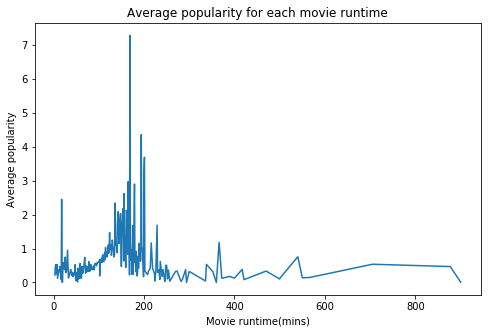

In [200]:
# calculating and plotting average popularity for each runtime
popularity_by_runtime = tmdb_df.groupby('runtime').popularity.mean()
plot_line_graph(popularity_by_runtime,'Average popularity for each movie runtime','Movie runtime(mins)','Average popularity');

In [201]:
# finding the runtime for highest average popularity
print('Movie runtime for highest average popularity is {} mins'.format(popularity_by_runtime.idxmax()))

Movie runtime for highest average popularity is 169.0 mins


In [202]:
# Average runtime for most popular movies
runtime_mean_highpop = high_pop['runtime'].mean()
print('Average runtime for most popular movies {} mins.'.format(runtime_mean_highpop))

Average runtime for most popular movies 105.62537624982363 mins.


> The movie runtime for the highest average popularity(considering full dataset) is 169.0 mins. According to the graph, we can conclude that runtime in between 100-200mins movies gets high popularity. When the runtime increases the popularity seems to decrease. <br/>

> Average runtime for most popular movies 105.62537624982363 mins.

### Research Question 10 -  What is the trend of average runtime of movies from year to year?

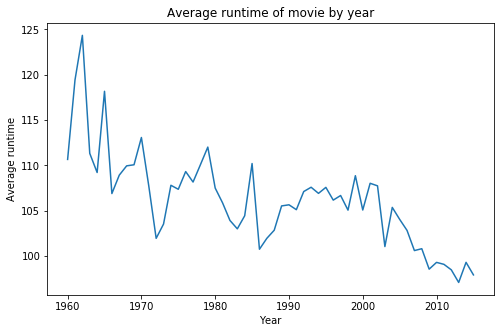

In [203]:
# calculating and plotting the mean runtime of movies in each year
runtime_mean = tmdb_df.groupby('release_year').runtime.mean()
plot_line_graph(runtime_mean,'Average runtime of movie by year','Year','Average runtime');

> According to the graph it seems average runtime of movies has decreased from 1960 to 2015.

### Research Question 11 - Which year has released the most number of movies?

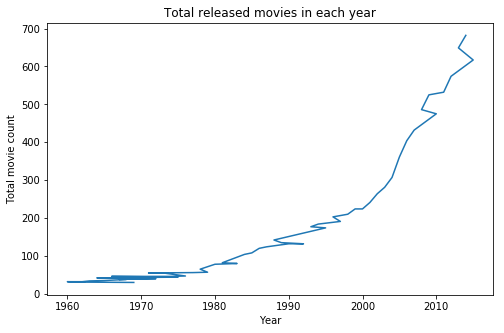

In [204]:
# calculating and plotting the number of movies released in each year
movie_count = tmdb_df['release_year'].value_counts()
plot_line_graph(movie_count,'Total released movies in each year','Year','Total movie count');

In [205]:
# finding the year that has release highest number of movies
print('highest number of movies has released in {}.'.format(movie_count.idxmax()))

highest number of movies has released in 2014.


> Year 2014 has released the highest number of movies. According to the graph, number of movies released in each year has significantly increased from 1960 to 2015.

### Research Question 12 -  What is the best month to release a movie?

In [206]:
# Adding a new column to tmdb_df as release_month by extracting the month from the release date column 
tmdb_df['release_month'] = pd.DatetimeIndex(tmdb_df['release_date']).month

In [207]:
# calculating the number of movies released in each month
month_count = tmdb_df['release_month'].value_counts().sort_index()

In [208]:
# this function plots a bar chart for values(given heights) with respect to months in the year
def plot_graph_by_month(p,t,x,y):
    '''
    input
    p = data series including heights of the bars
    t = tilte of the graph
    x = x-axis label
    y = y-axis label
    '''
    locations = [1,2,3,4,5,6,7,8,9,10,11,12]
    heights = [p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],p[11],p[12]]
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.bar(locations, heights, tick_label=labels)
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y);

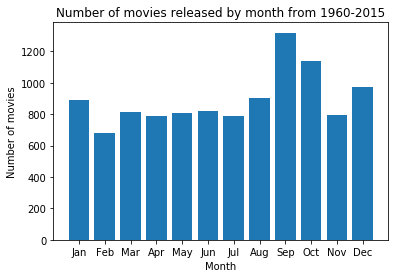

In [209]:
# plotting the graph for number of movies released in each month
plot_graph_by_month(month_count,'Number of movies released by month from 1960-2015','Month','Number of movies');

> Most movies have released in the 'September' month. October and December months also have released considerable number of movies.

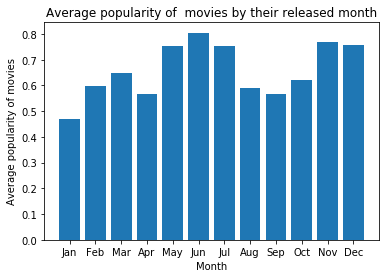

In [210]:
# calculating and plotting the average popularity of movies released in each month
popuplar_month = tmdb_df.groupby('release_month').popularity.mean()
plot_graph_by_month(popuplar_month,'Average popularity of  movies by their released month','Month','Average popularity of movies');

> According to the graph movies released in June has highest average popularity. Movies released in months May, July, November, and December also have received a high popularity.

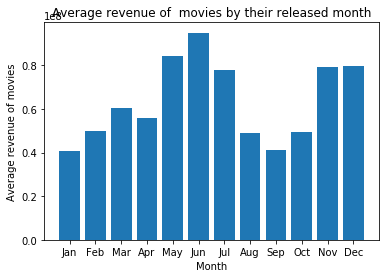

In [211]:
# calculating and plotting the number of high revenue movies released in each month
revenue_month = tmdb_df.groupby('release_month').revenue.mean()
plot_graph_by_month(revenue_month,'Average revenue of  movies by their released month','Month','Average revenue of movies');

> According to the graph movies release in 'June' has earned highest average revenue. Movies release in May, July, November and December also have recieved high average revenue compared to other months.

> By considering the above three graphs we can conclude that the best month to release a movie is 'June' if you are expecting to earn a high revenue and high popularity.  May, July, November, and December months also good months to release a movie to be successful.

<a id='conclusions'></a>
## Conclusions

> In the above project, we've analyzed the movie dataset with several perspectives. The initial dataset had 10866 rows and 21 columns. Observing the given dataset we've identified several issues and during the data wrangling process, we cleaned the dataset by executing several statistical methods, such as dropping unnecessary columns, correcting datatypes, removing duplicate rows, replacing zero values with their means and dropping null values. The final cleaned dataset included 10731 rows and 11 columns. Then the analysis was performed with the interest of finding the characteristics of a successful movie.

> Based on the analysis we've found below results,
    * The Avatar movie has earned the highest revenue and the Shattered Glass movie has earned the lowest revenue.
    * The Jurassic World movie has got the highest popularity and the Hospital movie got the lowest popularity.
    * Properties associated with high revenue movies are high popularity, high budget, and high vote count.
    * Average revenue for the high revenue movies is 183767258.322 dollars. 
    * Average popularity value for the high revenue movies is 1.624.
    * Average budget value for the high revenue movies is 52878810.486 dollars.
    * Average vote count for the high revenue movies is 814.637
    * There is no significant impact from movie runtime to movie revenue.
    * Average runtime value for the high revenue movies is 112.658 mins
    * By considering all findings related to genres, we can conclude that most used genres in every year are 'Drama', 'Comedy', 'Thriller', 'Action', 'Romance' and 'Horror'.  Least used genres are 'History', 'War','Foreign', 'Western','TV Movie'
    * Most used genres in high revenue movies are: 'Drama', 'Comedy', 'Action', 'Thriller' and 'Adventure'
    * Most used genres in most popular movies are: 'Drama', 'Comedy', 'Thriller', 'Action' and 'Adventure'
    * Most used directors in high revenue movies are Steven Spielberg, Clint Eastwood, Ridley Scott, Ron Howard, and Tim Burton.
    * Most used directors in most popular movies are  Woody Allen, Steven Spielberg, Clint Eastwood, Ridley Scott, and Ron Howard
    * Most used casts in high revenue movies are Robert De Niro, Bruce Willis, Tom Cruise, Brad Pitt, and Tom Hanks
    * Most used casts in most popular movies are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, and Tom Hanks
    * In movie economy maximum average profit has earned in the year 1977 and the minimum was in 1968.
    * When the movie runtime increases the popularity seems to decrease. 
    * Average runtime for most popular movies is 105.625 mins.
    * Average runtime of movies has decreased from 1960 to 2015.
    * Number of movies released each year has increased from 1960 to 2015. the highest number of movies have released in 2014.
    * The highest number of movies have released in the 'September' month.
    * Movies released in June have earned the highest average revenue and highest popularity.
    * Movies released in May, July, November, and December months also have received high revenue and high popularity.

> By considering all the above findings we can conclude that a movie to be successful(earn high revenue while being most popular) it should, 
    1. have an average 52878810.486 dollars budget
    2. have movie runtime in between 105.625 - 112.658 mins.
    3. use genres like: 'Drama', 'Comedy', 'Action', 'Thriller' and 'Adventure'
    4. have directors like Steven Spielberg, Clint Eastwood, Ridley Scott, Ron Howard
    5. have casts like Robert De Niro, Bruce Willis, Tom Hanks
    6. released in June. If not, it should release either May or July or November or December.
 Then this movie will receive,
    * 183767258.322 dollars revenue in average
    * 814.637 vote count in average
    * 1.624 popularity in average
    > Some limitations associated with the dataset are, the unit of each column was not given in this dataset. especially for budget, revenue, runtime columns. So I have assumed currency is in dollars and runtime is in minutes. In this dataset budget column had 52% zero values and the revenue column had 55% of zero values. That means 50% of useful data was zero. So I replaced these zero values with column mean value. Having a considerable amount of zero values is a limitation and filling those values with mean value can lead to wrong decisions. This dataset also had a considerable amount of null values and dropping such rows also lead to missing valuable information. 

In [213]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0